Apply data preprocessing on the given dataset , 

then split the dataset into train and test and predict the survival rate 

using Gaussian Naive Bayes.

In [0]:
import pandas as pd
import numpy as np
#import math

#for plotting
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

#train test split
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = model_selection.train_test_split(X,Y,test_size =0.3, random_state = 50)

#model

# for testing
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, accuracy_score

In [2]:
df = pd.read_csv("data.csv")
df.head(5)

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


Cleaning the values


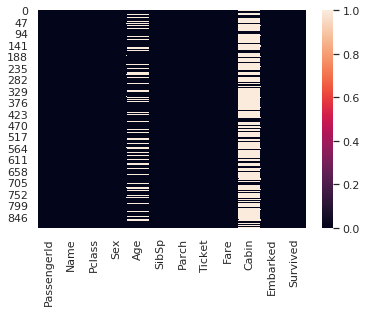

In [3]:
sb.heatmap(df.isnull())

In [4]:
df.isnull().sum()


PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [5]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [0]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)
df1 = pd.get_dummies(df['Sex'], drop_first=True) 
df2 = pd.get_dummies(df['Embarked'])

df.drop(['Embarked', 'Sex'], axis=1, inplace=True)


In [7]:
df = df.join([df1, df2])
df.head(5)

,Pclass,Age,SibSp,Parch,Survived,male,C,Q,S
0,3,22.0,1,0,0,1,0,0,1
1,1,38.0,1,0,1,0,1,0,0
2,3,26.0,0,0,1,0,0,0,1
3,1,35.0,1,0,1,0,0,0,1
4,3,35.0,0,0,0,1,0,0,1


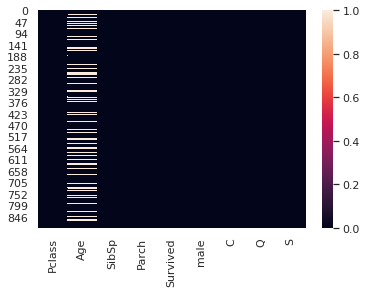

In [8]:
sb.heatmap(df.isnull())

In [9]:
# Replacing age with the mean value
meann = df.Age.mean()


df['Age'] = df['Age'].replace(np.nan, meann)
df.head(5)

,Pclass,Age,SibSp,Parch,Survived,male,C,Q,S
0,3,22.0,1,0,0,1,0,0,1
1,1,38.0,1,0,1,0,1,0,0
2,3,26.0,0,0,1,0,0,0,1
3,1,35.0,1,0,1,0,0,0,1
4,3,35.0,0,0,0,1,0,0,1


In [0]:
X = df.drop('Survived', axis=1)
Y = df.Survived

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size =0.3, random_state = 50)

SKlearn

In [11]:
from sklearn.naive_bayes import GaussianNB
cls = GaussianNB()

cls.fit(x_train, y_train)
pre = cls.predict(x_test)
pre

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0])

In [16]:
a = classification_report(y_test, pre)
print(a)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       162
           1       0.78      0.75      0.77       106

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



##For Shubham

In [12]:
a=[]

for i in range(10+1):
    a.append(i)
print(a)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [13]:
[i for i in range(10+1)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [14]:
a = []
i = [1, 2, 3, 4, 5]
j = [6, 7, 8, 9, 10]
a.extend(i)
a.extend(j)
print(a)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
